# **CUSTOMER SEGMENTATION PROJECT**

**Customer Personality Analysis** involves a thorough examination of a company's optimal customer profiles. This analysis facilitates a deeper understanding of customers, enabling businesses to tailor products to meet the distinct needs, behaviors, and concerns of various customer types.

By conducting a Customer Personality Analysis, businesses can refine their products based on the preferences of specific customer segments. Rather than allocating resources to market a new product to the entire customer database, companies can identify the segments most likely to be interested in the product. Subsequently, targeted marketing efforts can be directed toward those particular segments, optimizing resource utilization and increasing the likelihood of successful product adoption.

Details of Features are as below:

Id: Unique identifier for each individual in the dataset.  
Year_Birth: The birth year of the individual.  
Education: The highest level of education attained by the individual.  
Marital_Status: The marital status of the individual.  
Income: The annual income of the individual.  
Kidhome: The number of young children in the household.  
Teenhome: The number of teenagers in the household.  
Dt_Customer: The date when the customer was first enrolled or became a part of the company's database.  
Recency: The number of days since the last purchase or interaction.  
MntWines: The amount spent on wines.  
MntFruits: The amount spent on fruits.  
MntMeatProducts: The amount spent on meat products.  
MntFishProducts: The amount spent on fish products.  
MntSweetProducts: The amount spent on sweet products.  
MntGoldProds: The amount spent on gold products.  
NumDealsPurchases: The number of purchases made with a discount or as part of a deal.  
NumWebPurchases: The number of purchases made through the company's website.  
NumCatalogPurchases: The number of purchases made through catalogs.  
NumStorePurchases: The number of purchases made in physical stores.  
NumWebVisitsMonth: The number of visits to the company's website in a month.  
AcceptedCmp3: Binary indicator (1 or 0) whether the individual accepted the third marketing campaign.  
AcceptedCmp4: Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign.  
AcceptedCmp5: Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign.  
AcceptedCmp1: Binary indicator (1 or 0) whether the individual accepted the first marketing campaign.  
AcceptedCmp2: Binary indicator (1 or 0) whether the individual accepted the second marketing campaign.  
Complain: Binary indicator (1 or 0) whether the individual has made a complaint.  
Z_CostContact: A constant cost associated with contacting a customer.  
Z_Revenue: A constant revenue associated with a successful campaign response.  
Response: Binary indicator (1 or 0) whether the individual responded to the marketing campaign.  

**IMPORTING NECESSARY LIBRARIES**

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [81]:
warnings.filterwarnings("ignore")

**IMPORTING DATASET**

**Assigning the dataset into a Variable**

In [82]:


# Load the data into a DataFrame
df = pd.read_csv('Customer_Segmentation_Excel .csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [83]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [84]:
df.duplicated().sum()

np.int64(0)

In [85]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [87]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [88]:
df.shape

(2240, 29)

In [89]:
df.isna().sum().sum()

np.int64(24)

In [90]:
df.dropna(inplace=True)

In [91]:
df.shape

(2216, 29)

In [92]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [93]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [94]:
df['Education'].nunique() #checking the no of uniques values in Education Column

5

In [95]:
df['Education'].value_counts() #checking for unique values in the Education Column an dthe value counts

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [96]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

**DATA CLEANING**

In [97]:
#Converting the date time column to date_time format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst = True)
df['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [99]:
df['Age'] = 2025 - df['Year_Birth']
df['Age']

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2216, dtype: int64

In [100]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [101]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df['Total_Children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Total_Children, Length: 2216, dtype: int64

In [102]:
df['Total_Children'].value_counts()

Total_Children
1    1117
0     633
2     416
3      50
Name: count, dtype: int64

In [103]:
df['Total_Spendings'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Total_Spendings']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Spendings, Length: 2216, dtype: int64

In [104]:
df['Customer_Since'] = (pd.Timestamp('now') - df['Dt_Customer']).dt.days # Calculating the number of days the a customer has been associated with the company
df['Customer_Since']

0       4845
1       4295
2       4494
3       4321
4       4343
        ... 
2235    4563
2236    4201
2237    4337
2238    4338
2239    4804
Name: Customer_Since, Length: 2216, dtype: int64

## **EXPLORATORY DATA ANALYSIS**

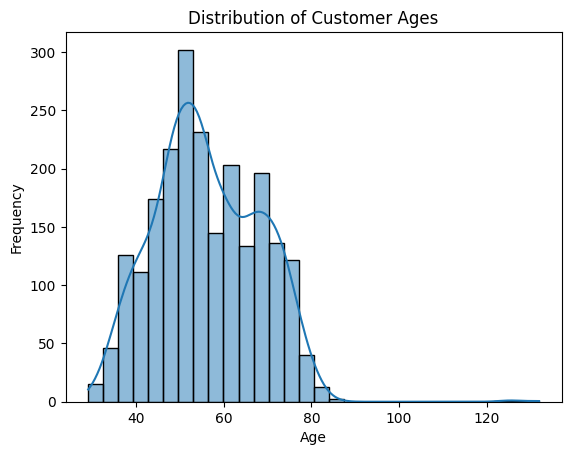

In [105]:
# Histogram Plot and KDE curve for the age distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

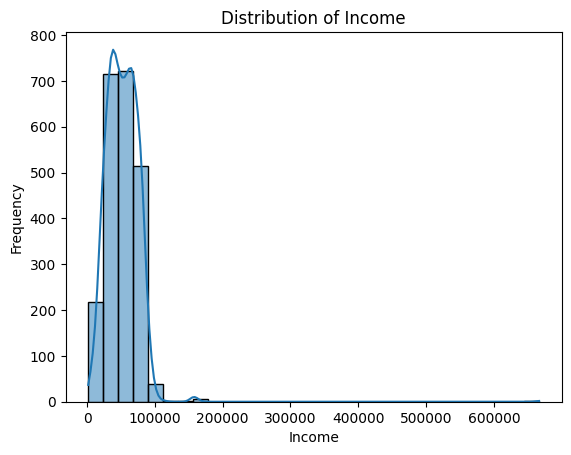

In [106]:
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

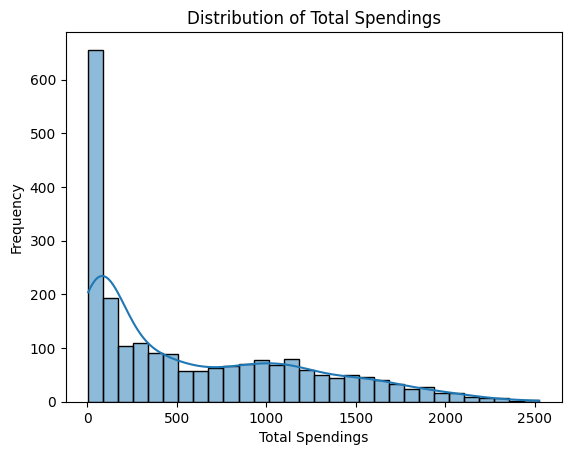

In [107]:
sns.histplot(df['Total_Spendings'], bins=30, kde=True)
plt.title('Distribution of Total Spendings')
plt.xlabel('Total Spendings')
plt.ylabel('Frequency')
plt.show()

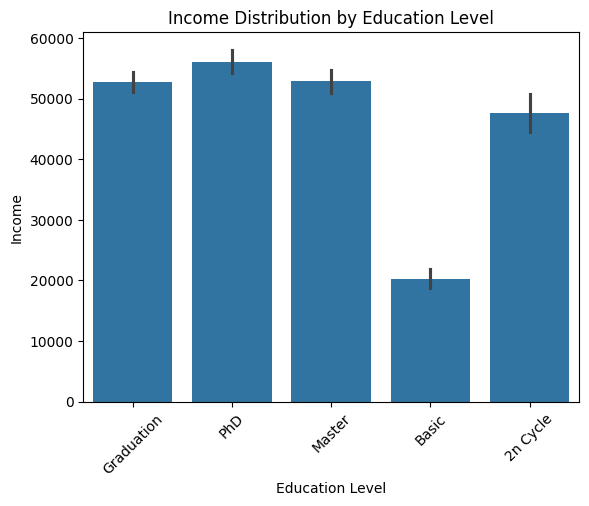

In [108]:
#Bar plot showing the average income across all educational levels
sns.barplot(x="Education", y="Income", data=df)
plt.xticks(rotation=45)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.show()

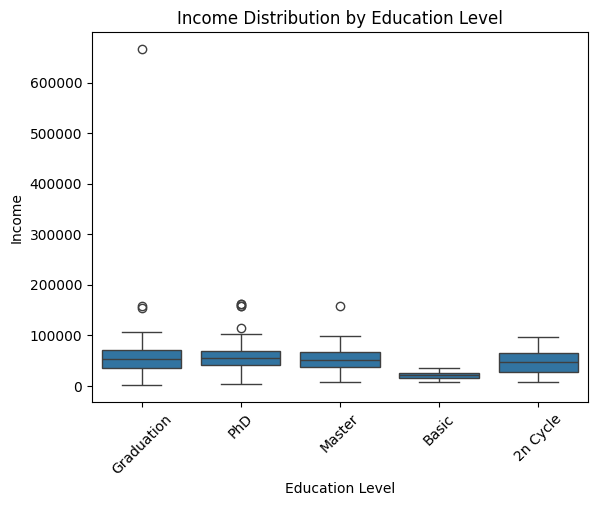

In [109]:
sns.boxplot(x="Education", y="Income", data=df)
plt.xticks(rotation=45)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.show()

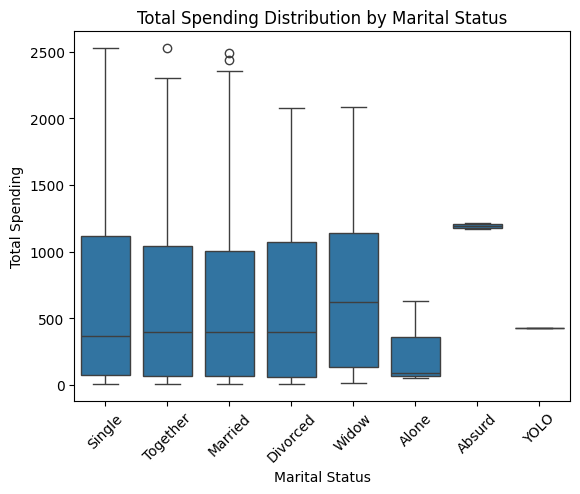

In [110]:
sns.boxplot(x="Marital_Status", y="Total_Spendings", data=df)
plt.xticks(rotation=45)
plt.title('Total Spending Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Spending')
plt.show()


In [111]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spendings', 'Customer_Since'],
      dtype='object')

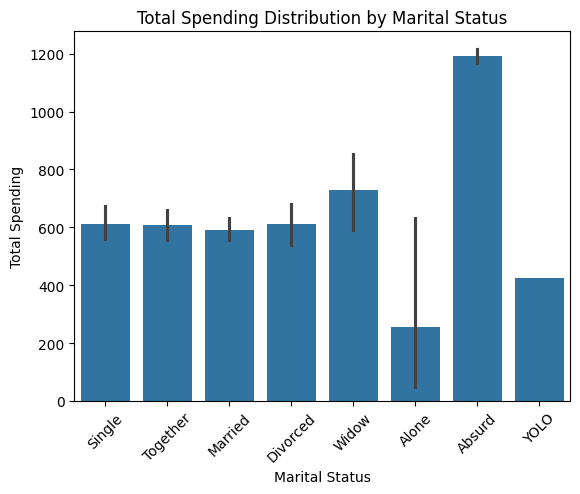

In [112]:
sns.barplot(x="Marital_Status", y="Total_Spendings", data=df)
plt.xticks(rotation=45)
plt.title('Total Spending Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Spending')
plt.show()

In [113]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spendings', 'Customer_Since'],
      dtype='object')

In [114]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spendings', 'Customer_Since'],
      dtype='object')

In [115]:
#creating a list of columns
corr_cols = df[['Age', 'Income', 'Recency', 'Total_Spendings', 'NumWebPurchases', 'NumStorePurchases']]
corr_cols


,Age,Income,Recency,Total_Spendings,NumWebPurchases,NumStorePurchases
0,68,58138.0,58,1617,8,4
1,71,46344.0,38,27,1,2
2,60,71613.0,26,776,8,10
3,41,26646.0,26,53,2,4
4,44,58293.0,94,422,5,6
...,...,...,...,...,...,...
2235,58,61223.0,46,1341,9,4
2236,79,64014.0,56,444,8,5
2237,44,56981.0,91,1241,2,13
2238,69,69245.0,8,843,6,10


In [116]:
#performing the correlation matrix across the following columns
corr_cols.corr()

,Age,Income,Recency,Total_Spendings,NumWebPurchases,NumStorePurchases
Age,1.000000,0.161791,0.016295,0.113487,0.153051,0.127891
Income,0.161791,1.000000,-0.003970,0.667576,0.387878,0.529362
Recency,0.016295,-0.003970,1.000000,0.020066,-0.005641,-0.000434
Total_Spendings,0.113487,0.667576,0.020066,1.000000,0.528973,0.675181
NumWebPurchases,0.153051,0.387878,-0.005641,0.528973,1.000000,0.516240
NumStorePurchases,0.127891,0.529362,-0.000434,0.675181,0.516240,1.000000


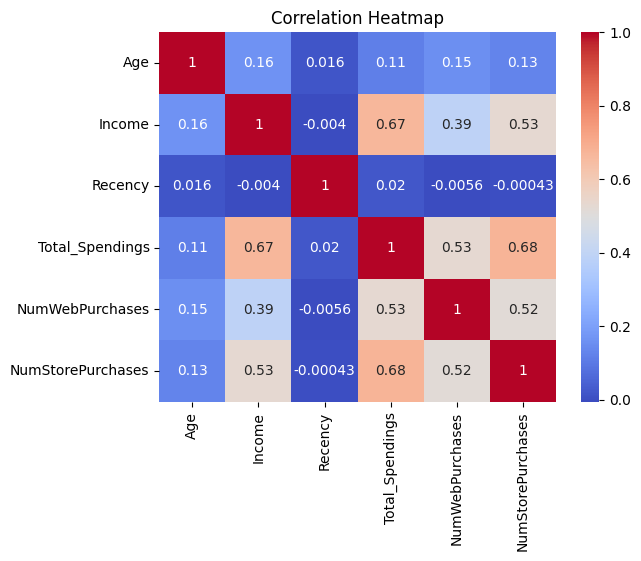

In [117]:
sns.heatmap(corr_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

From here we can see that Total Spendings and Income are highly correlated.

In [118]:
#creating a pivot table from the DataFrame to analyze the average income based on different educational levels and marital statuses
pivot_income = df.pivot_table(values='Income', index='Education', columns='Marital_Status', aggfunc='mean')
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


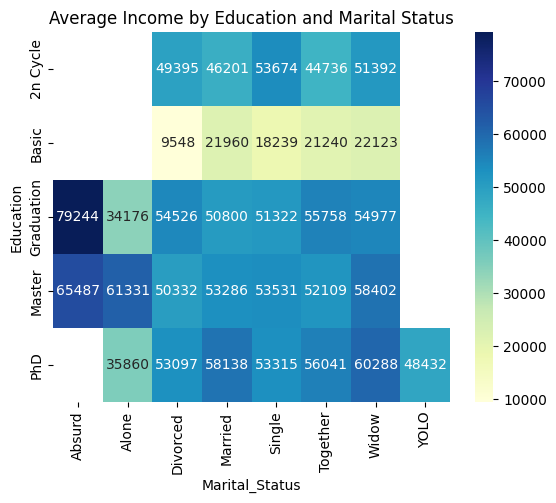

In [119]:
sns.heatmap(pivot_income, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Average Income by Education and Marital Status')
plt.show()

In [120]:
# calculating the average total spending for each education level
group1 = df.groupby('Education')['Total_Spendings'].mean().sort_values(ascending=False)
group1

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_Spendings, dtype: float64

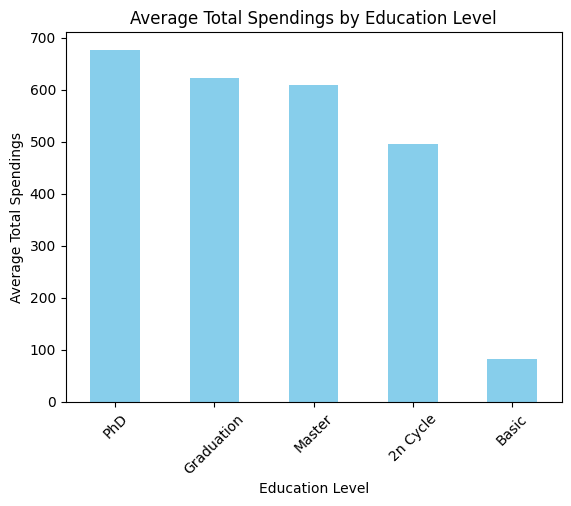

In [121]:
# bar plot to visualize the average total spendings by different education levels
group1.plot(kind='bar', color='skyblue')
plt.title('Average Total Spendings by Education Level')
plt.xticks(rotation=45)
plt.ylabel('Average Total Spendings')
plt.xlabel('Education Level')
plt.show()

In [122]:
df["Accepted_Any_Campaign"] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df["Accepted_Any_Campaign"]

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: Accepted_Any_Campaign, Length: 2216, dtype: int64

In [123]:
df['Accepted_Any_Campaign'].unique()

array([1, 0, 3, 2, 4, 5])

In [124]:
#The campaign Column is converted into a binary indicator (0 or 1), and then checking the unique values
df['Accepted_Any_Campaign'] = df['Accepted_Any_Campaign'].apply(lambda x: 1 if x > 0 else 0)
df['Accepted_Any_Campaign'].unique()

array([1, 0])

In [125]:
group2 = df.groupby('Marital_Status')['Accepted_Any_Campaign'].mean().sort_values(ascending=False)
group2

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: Accepted_Any_Campaign, dtype: float64

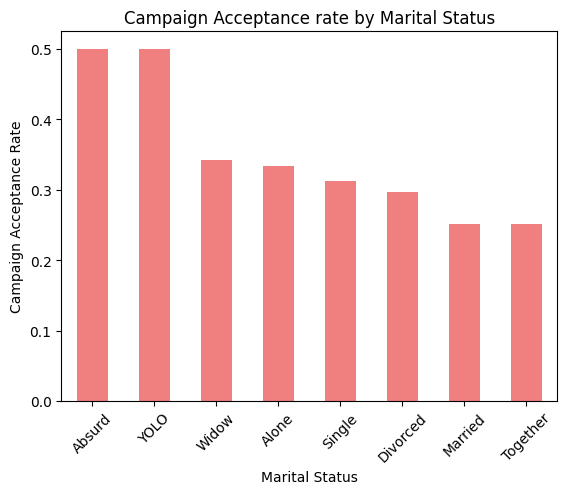

In [126]:
group2.plot(kind='bar', color='lightcoral')
plt.title('Campaign Acceptance rate by Marital Status')
plt.xticks(rotation=45)
plt.ylabel('Campaign Acceptance Rate')
plt.xlabel('Marital Status')
plt.show()


In [127]:
bins = [18, 30, 40, 50, 60, 70, 80, 90]
labels = ["18-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"]

In [128]:
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)
df["Age_Group"]

0       60-69
1       70-79
2       60-69
3       40-49
4       40-49
        ...  
2235    50-59
2236    70-79
2237    40-49
2238    60-69
2239    70-79
Name: Age_Group, Length: 2216, dtype: category
Categories (7, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70-79' < '80+']

In [129]:
group3 = df.groupby('Age_Group')['Income'].mean().sort_values(ascending=True)
group3

Age_Group
18-29    10960.500000
30-39    47905.475676
40-49    48057.587649
50-59    50479.321534
60-69    55980.030928
70-79    58190.713018
80+      67237.217391
Name: Income, dtype: float64

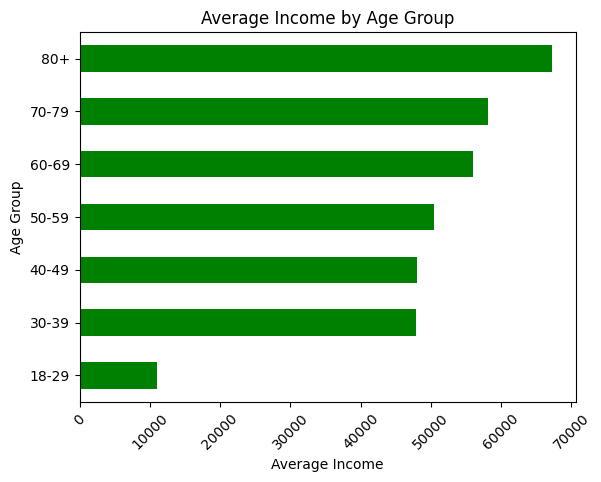

In [130]:
group3.plot(kind='barh', color='green')
plt.title('Average Income by Age Group')
plt.xticks(rotation=45)
plt.ylabel('Age Group')
plt.xlabel('Average Income')
plt.show()

## **CLUSTERING PROCESS**

In [131]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spendings', 'Customer_Since',
       'Accepted_Any_Campaign', 'Age_Group'],
      dtype='object')

In [132]:
Features = ['Age', 'Income', 'Total_Spendings', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Recency']
X= df[Features].copy()
X


,Age,Income,Total_Spendings,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,8,4,7,58
1,71,46344.0,27,1,2,5,38
2,60,71613.0,776,8,10,4,26
3,41,26646.0,53,2,4,6,26
4,44,58293.0,422,5,6,5,94
...,...,...,...,...,...,...,...
2235,58,61223.0,1341,9,4,5,46
2236,79,64014.0,444,8,5,7,56
2237,44,56981.0,1241,2,13,6,91
2238,69,69245.0,843,6,10,3,8


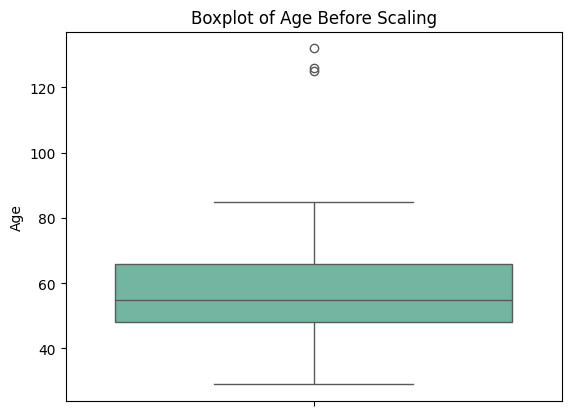

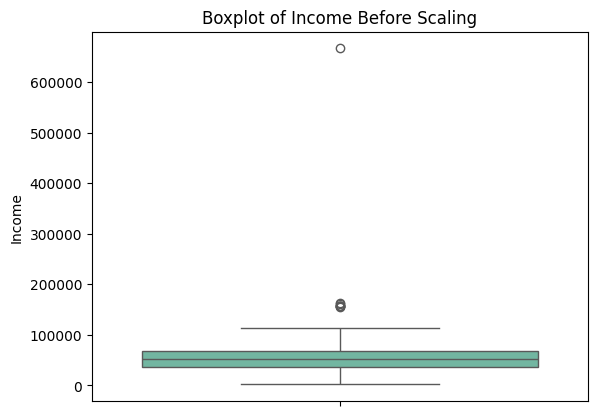

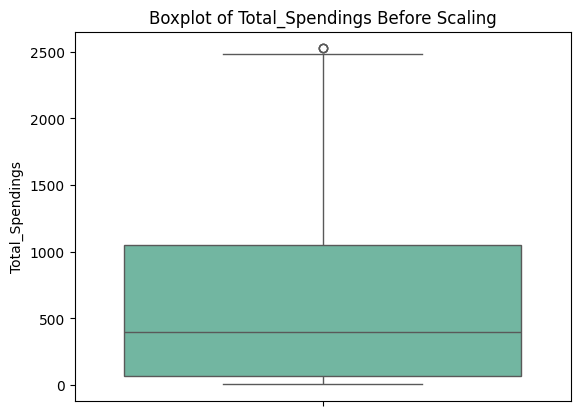

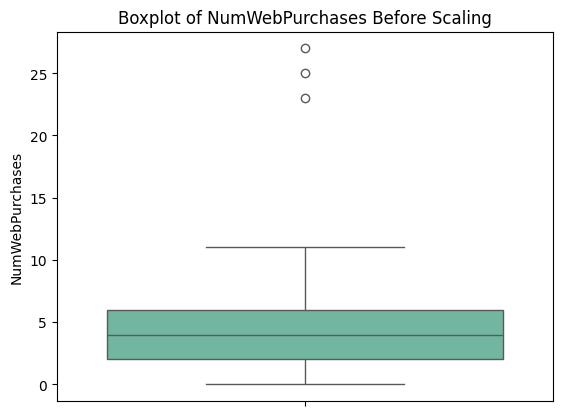

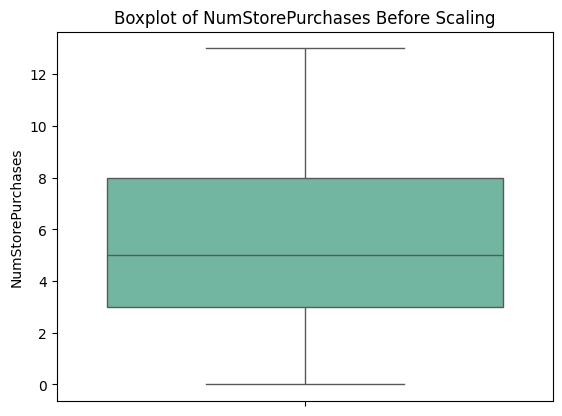

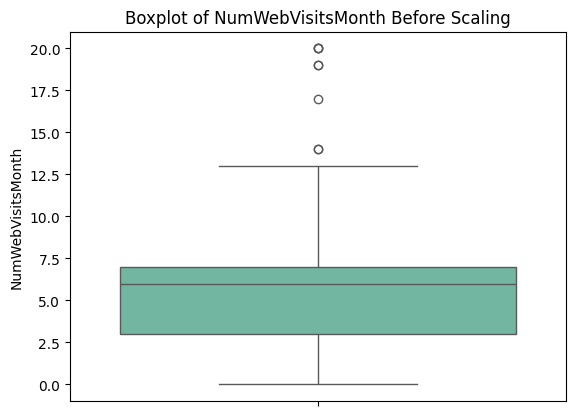

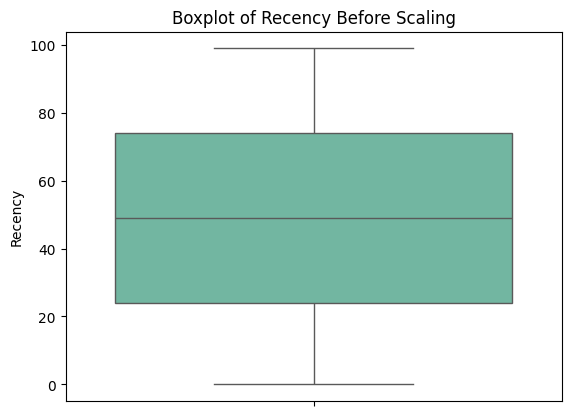

In [133]:
for col in X.columns:
    sns.boxplot(data=X[col], palette="Set2")
    plt.title(f'Boxplot of {col} Before Scaling') 
    plt.show()

In [150]:
X.describe()

,Age,Income,Total_Spendings,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,56.179603,52247.251354,607.075361,4.085289,5.800993,5.319043,49.012635
std,11.985554,25173.076661,602.900476,2.740951,3.250785,2.425359,28.948352
min,29.000000,1730.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,35303.000000,69.000000,2.000000,3.000000,3.000000,24.000000
50%,55.000000,51381.500000,396.500000,4.000000,5.000000,6.000000,49.000000
75%,66.000000,68522.000000,1048.000000,6.000000,8.000000,7.000000,74.000000
max,132.000000,666666.000000,2525.000000,27.000000,13.000000,20.000000,99.000000


**FEATURE SCALING**

In [134]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.55414289,
         0.69323197, -0.31140528]], shape=(2216, 7))

**CLUSTERING PROCESS**

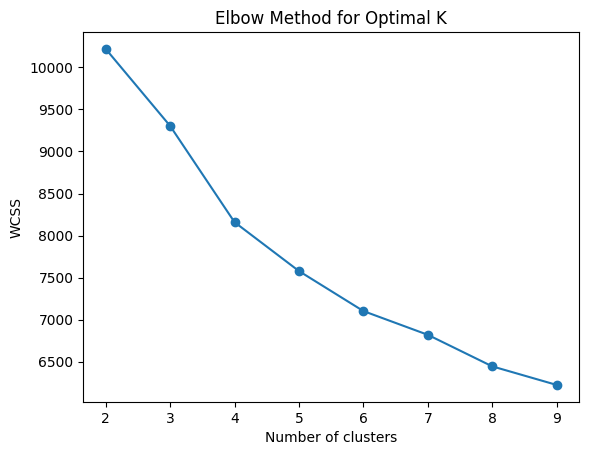

In [135]:
#Determining the number of K for our clustering algorithm using the Elbow method
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

wcss

plt.plot(range(2, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [136]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42)
df["Cluster"] = model.fit_predict(X_scaled)
df['Cluster']

0       3
1       0
2       3
3       0
4       2
       ..
2235    3
2236    3
2237    1
2238    1
2239    0
Name: Cluster, Length: 2216, dtype: int32

In [137]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spendings,Customer_Since,Accepted_Any_Campaign,Age_Group,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,68,0,1617,4845,1,60-69,3
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,71,2,27,4295,0,70-79,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,60,0,776,4494,0,60-69,3
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,41,1,53,4321,0,40-49,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,44,1,422,4343,0,40-49,2


In [138]:
cluster_summary = df.groupby('Cluster')[Features].mean()
cluster_summary

,Age,Income,Total_Spendings,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,52.241319,34393.715278,117.152778,2.184028,3.315972,6.538194,24.838542
1,57.015254,77137.727119,1270.849153,4.440678,8.428814,2.432203,51.676271
2,55.749077,36715.747232,136.258303,2.416974,3.496310,6.357934,75.238007
3,60.133858,60153.415354,893.988189,7.608268,8.025591,6.181102,45.348425


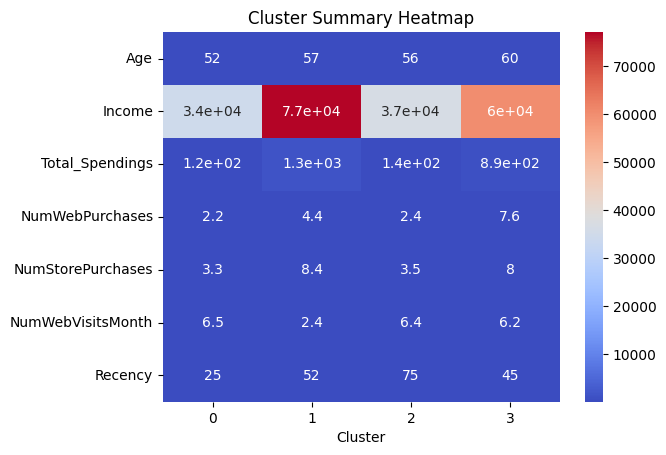

In [139]:
sns.heatmap(cluster_summary.T, annot=True, cmap='coolwarm')
plt.title('Cluster Summary Heatmap')
plt.show()

In [140]:
df["Cluster"].value_counts()

Cluster
1    590
0    576
2    542
3    508
Name: count, dtype: int64

**VISUALIZING THE CLUSTERS**

In [141]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca
df["PCA1"], df["PCA2"] = X_pca[:, 0], X_pca[:, 1]
X_pca

array([[ 1.1075188 , -0.21175951],
       [-1.33673385,  0.269839  ],
       [ 1.88227676, -1.01416098],
       ...,
       [ 1.1535966 ,  1.15056999],
       [ 1.88768024, -1.16073698],
       [-0.84182091, -0.15963623]], shape=(2216, 2))

In [142]:
df["PCA1"]

0       1.107519
1      -1.336734
2       1.882277
3      -1.784359
4       0.020363
          ...   
2235    1.248177
2236    0.508708
2237    1.153597
2238    1.887680
2239   -0.841821
Name: PCA1, Length: 2216, dtype: float64

In [143]:
df["PCA2"]

0      -0.211760
1       0.269839
2      -1.014161
3      -0.704928
4       1.235265
          ...   
2235   -0.535766
2236   -0.141328
2237    1.150570
2238   -1.160737
2239   -0.159636
Name: PCA2, Length: 2216, dtype: float64

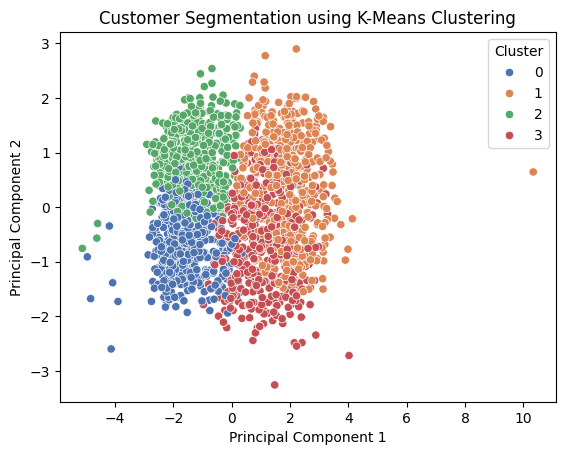

In [144]:
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="deep")
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [145]:
df[Features].describe()

,Age,Income,Total_Spendings,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,56.179603,52247.251354,607.075361,4.085289,5.800993,5.319043,49.012635
std,11.985554,25173.076661,602.900476,2.740951,3.250785,2.425359,28.948352
min,29.000000,1730.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,35303.000000,69.000000,2.000000,3.000000,3.000000,24.000000
50%,55.000000,51381.500000,396.500000,4.000000,5.000000,6.000000,49.000000
75%,66.000000,68522.000000,1048.000000,6.000000,8.000000,7.000000,74.000000
max,132.000000,666666.000000,2525.000000,27.000000,13.000000,20.000000,99.000000


In [146]:
loadings_matrix = pca.components_

# Create a DataFrame for easy viewing and interpretation
loading_scores = pd.DataFrame(
    loadings_matrix.T, # Transpose to make features the rows
    columns=[f'PC{i+1}' for i in range(loadings_matrix.shape[0])],
    index=['Age', 'Income', 'Total_Spendings', 'NumWebPurchases',
           'NumStorePurchases', 'NumWebVisitsMonth', 'Recency']
)

print(loading_scores)

                        PC1       PC2
Age                0.146284  0.112376
Income             0.473544  0.057477
Total_Spendings    0.508168 -0.020682
NumWebPurchases    0.363855 -0.298794
NumStorePurchases  0.473782 -0.079017
NumWebVisitsMonth -0.373101 -0.284657
Recency            0.007572  0.898381


Cluster	PC1 Position (X-Axis)	PC2 Position (Y-Axis)	Unified Business Profile  
1 (Orange) & 3 (Red)	High Positive PC1	Varies	  High-Value Customers (High Income/Spending)  
0 (Blue) & 2 (Green)	Negative PC1	Varies	Low-Value Customers (Low Income/Spending)  
2 (Green) & 1 (Orange)	Varies	High Positive PC2	Inactive/At-Risk Customers (High Recency)  
0 (Blue) & 3 (Red)	Varies	Low Negative PC2	Recently Active Customers (Low Recency)  

Focus Resource Allocation (Clusters 3 & 1): The two clusters on the right side of the plot (High PC1) represent your most valuable customers by income and spending. They deserve the largest share of retention and personalized marketing budget.

Immediate Win-Back (Cluster 1): This segment is high value but currently inactive (High Recency). They are your highest-priority win-back target. A highly personalized re-engagement campaign should be launched immediately before they churn.

Uplift Strategy (Cluster 0): This segment is low value but recently purchased (Low Recency). They are highly active and are prime candidates for upselling and cross-selling campaigns designed to boost their Total_Spendings and Income relationship with the company.

In [147]:


# Data for all four clusters, ensuring 'Cluster' and 'Color' are separate columns
data = {
    'Cluster': [3, 1, 0, 2],
    'Color': ['Red', 'Orange', 'Blue', 'Green'],
    'PC1 Position (Value)': ['High', 'High', 'Low', 'Low'],
    'PC2 Position (Recency)': ['Low (Active)', 'High (Inactive)', 'Low (Active)', 'High (Inactive)'],
    'Implied Quantified Traits (Averages)': [
        'Highest Spend, Lowest Recency, High Store Visits',
        'High Spend, Highest Recency, High Web Visits',
        'Lowest Income/Spend, Very Recent Purchase, Low Store/Web Purchases',
        'Low Income/Spend, Long Time Since Purchase, High Web Visits/Recency'
    ],
    'Proposed Name': [
        'Affluent Loyalists',
        'At-Risk High Spenders',
        'The Engaged Bargain Hunters',
        'Dormant/Lowest-Value Churn'
    ]
}

# Create the DataFrame and reorder columns
df_profiles_new = pd.DataFrame(data)

column_order = [
    'Cluster', 'Color', 'PC1 Position (Value)', 'PC2 Position (Recency)',
    'Implied Quantified Traits (Averages)', 'Proposed Name'
]
df_profiles_new = df_profiles_new[column_order]

print(df_profiles_new)

   Cluster   Color PC1 Position (Value) PC2 Position (Recency)  \
0        3     Red                 High           Low (Active)   
1        1  Orange                 High        High (Inactive)   
2        0    Blue                  Low           Low (Active)   
3        2   Green                  Low        High (Inactive)   

                Implied Quantified Traits (Averages)  \
0   Highest Spend, Lowest Recency, High Store Visits   
1       High Spend, Highest Recency, High Web Visits   
2  Lowest Income/Spend, Very Recent Purchase, Low...   
3  Low Income/Spend, Long Time Since Purchase, Hi...   

                 Proposed Name  
0           Affluent Loyalists  
1        At-Risk High Spenders  
2  The Engaged Bargain Hunters  
3   Dormant/Lowest-Value Churn  


In [148]:
df_profiles_new

,Cluster,Color,PC1 Position (Value),PC2 Position (Recency),Implied Quantified Traits (Averages),Proposed Name
0,3,Red,High,Low (Active),"Highest Spend, Lowest Recency, High Store Visits",Affluent Loyalists
1,1,Orange,High,High (Inactive),"High Spend, Highest Recency, High Web Visits",At-Risk High Spenders
2,0,Blue,Low,Low (Active),"Lowest Income/Spend, Very Recent Purchase, Low...",The Engaged Bargain Hunters
3,2,Green,Low,High (Inactive),"Low Income/Spend, Long Time Since Purchase, Hi...",Dormant/Lowest-Value Churn


🎯 **Key Goals of Segmentation**  
Segmentation moves a company away from a "one-size-fits-all" approach to a targeted, precise strategy.

1. Resource Optimization
Prioritization: It allows the company to identify and prioritize the most valuable segments (like your "Affluent Loyalists" cluster) so that the majority of marketing budget, sales effort, and high-quality service resources are directed where they will yield the highest return.

Efficiency: It prevents wasting money on generic campaigns that are irrelevant to most of the customer base.

2. Personalization and Relevance
Tailored Messaging: Segmentation enables the creation of marketing messages and content that resonate deeply with the specific needs, pain points, and language of each group.

Product Development: It helps identify unmet needs within specific segments, guiding the development of new products or features designed for that particular group (e.g., developing a loyalty program specifically for the "Affluent Loyalists").

3. Improved Retention and Reduced Churn
Risk Identification: By identifying segments with high Recency (like your "At-Risk High Spenders" cluster), the company can proactively intervene with win-back campaigns before those customers fully churn.

Loyalty: It allows the company to reward the most loyal customers appropriately, strengthening the relationship and increasing their Lifetime Value (LTV).

4. Competitive Advantage
Targeted Focus: By focusing efforts on specific segments where the company has a competitive advantage, it can dominate that niche rather than trying to compete broadly across the entire market.

In [149]:
import joblib

joblib.dump(model, "kmeans_model.pkl")
joblib.dump(scaler, "kscaler.pkl")


['kscaler.pkl']